## Question

Forecast the **CocaCola prices** and **Airlines Passengers data** set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for forecasting.

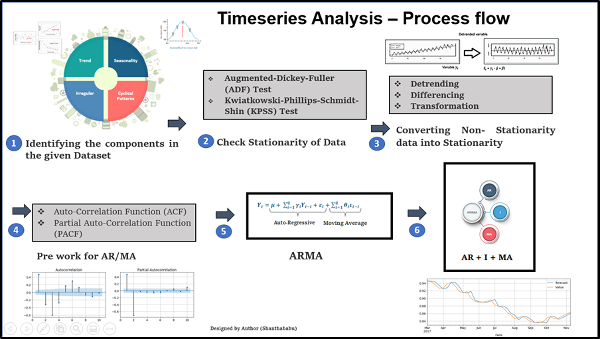

## Time Series Analysis

Time series analysis is a specific way of analyzing a sequence of data points collected over time. In TSA, analysts record data points at consistent intervals over a set period rather than just recording the data points intermittently or randomly.

**Objectives of Time Series Analysis**

+ To understand how time series works and what factors affect a certain variable(s) at different points in time.
+ Time series analysis will provide the consequences and insights of the given dataset’s features that change over time.
+ Supporting to derive the predicting the future values of the time series variable.
+ Assumptions: There is only one assumption in TSA, which is “stationary,” which means that the origin of time does not affect the properties of the process under the statistical factor.

**How to Analyze Time Series?**

To perform the time series analysis, we have to follow the following steps:

+ Collecting the data and cleaning it
+ Preparing Visualization with respect to time vs key feature
+ Observing the stationarity of the series
+ Developing charts to understand its nature.
+ Model building – AR, MA, ARMA and ARIMA
+ Extracting insights from prediction

**Significance of Time Series**

TSA is the backbone for prediction and forecasting analysis, specific to time-based problem statements.

+ Analyzing the historical dataset and its patterns
+ Understanding and matching the current situation with patterns derived from the previous stage.
+ Understanding the factor or factors influencing certain variable(s) in different periods.

With the help of “Time Series,” we can prepare numerous time-based analyses and results.

+ **Forecasting:** Predicting any value for the future.
+ **Segmentation:** Grouping similar items together.
+ **Classification:** Classifying a set of items into given classes.
+ **Descriptive analysis:** Analysis of a given dataset to find out what is there in it.
+ **Intervention analysis:** Effect of changing a given variable on the outcome.

**Components of Time Series Analysis**

+ **Trend:** In which there is no fixed interval and any divergence within the given dataset is a continuous timeline. The trend would be Negative or Positive or Null Trend
+ **Seasonality:** In which regular or fixed interval shifts within the dataset in a continuous timeline. Would be bell curve or saw tooth
+ **Cyclical:** In which there is no fixed interval, uncertainty in movement and its pattern
+ **Irregularity:** Unexpected situations/events/scenarios and spikes in a short time span.
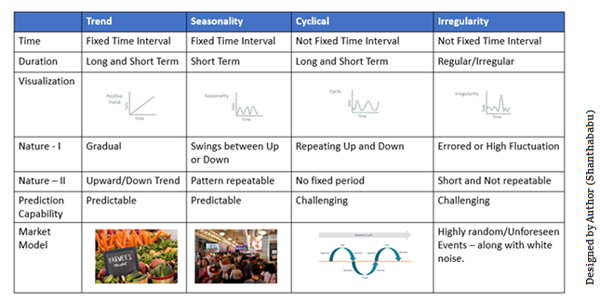

**Limitations of Time Series Analysis**

Time series has the below-mentioned limitations; we have to take care of those during our data analysis.

+ Similar to other models, the missing values are not supported by TSA
+ The data points must be linear in their relationship.
+ Data transformations are mandatory, so they are a little expensive.
+ Models mostly work on Uni-variate data.

**Data Types of Time Series**

+ **Stationary:** A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.

  + The **mean** value of them should be completely constant in the data during the analysis.
  + The **variance** should be constant with respect to the time-frame
  + **Covariance** measures the relationship between two variables.
+ **Non- Stationary:** If either the mean-variance or covariance is changing with respect to time, the dataset is called non-stationary.
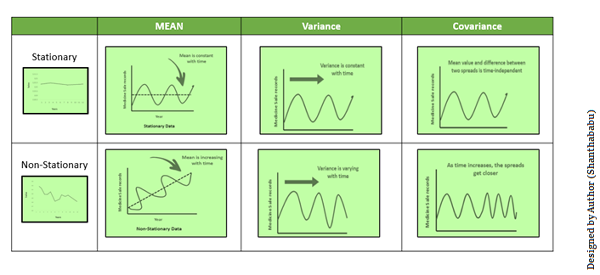

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Airline_data=pd.read_excel('Airlines+Data.xlsx')
Airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## Data Understanding

In [4]:
Airline_data.shape

(96, 2)

In [5]:
Airline_data.columns

Index(['Month', 'Passengers'], dtype='object')

In [6]:
Airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
Airline_data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
Airline_data.nunique()

Month         96
Passengers    80
dtype: int64

In [9]:
Airline_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


The data contain 96 rows & 2 columns. The columns are 'Month' & 'Passengers'.No null values are present.

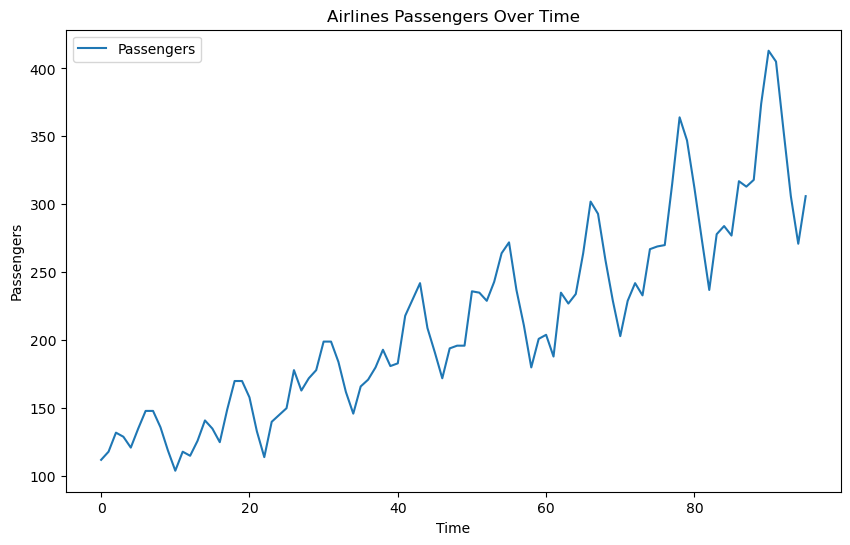

In [10]:
# Plotting the graph of Passengers column
plt.figure(figsize=(10,6))
plt.plot(Airline_data['Passengers'],label='Passengers')
plt.title('Airlines Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

We can see an increasing trend. But we need to check whether it's stationary or not.

**Methods to Check Stationarity**

During the TSA model preparation workflow, we must assess whether the dataset is stationary or not. This is done using Statistical Tests. There are two tests available to test if the dataset is stationary:

+ Augmented Dickey-Fuller (ADF) Test
+ Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

#### 1.Augmented Dickey-Fuller (ADF) Test or Unit Root Test

The ADF test is the most popular statistical test. It is done with the following assumptions:

+ Null Hypothesis (H0): Series is non-stationary
+ Alternate Hypothesis (HA): Series is stationary
  + p-value >0.05 Fail to reject (H0)
  + p-value <= 0.05 Accept (H1)
  
#### 2.Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

These tests are used for testing a NULL Hypothesis (HO) that will perceive the time series as stationary around a deterministic trend against the alternative of a unit root. Since TSA is looking for Stationary Data for its further analysis, we have to ensure that the dataset is stationary.  

For this data we can perform ADF test.

H0:series is non-stationary

H1:series is stationary    

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result=adfuller(Airline_data['Passengers'])

print('ADF Statistic:',result[0])
print('p-value:',result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.3402479596466979
p-value: 0.9968250481137263
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586


Since the p-value is greater than 0.05 we fail to reject null hypothesis.Therefore the series is non-stationary.

## Feature Engineering

In [12]:
# Rename the column heading 'Month' to 'Date'
Airline_data.rename(columns={'Month': 'Date'}, inplace=True)

# Print the updated column names
print(Airline_data.columns)

Index(['Date', 'Passengers'], dtype='object')


In [13]:
Data=Airline_data.copy()

In [14]:
# Convert 'Date' column to datetime format
Airline_data['Date']=pd.to_datetime(Airline_data['Date'])

In [15]:
# Create separate columns for day, month, and year
Airline_data['Day']=Airline_data['Date'].dt.day
Airline_data['Month']=Airline_data['Date'].dt.month
Airline_data['Year']=Airline_data['Date'].dt.year

# Print the updated dataset with new columns
print(Airline_data.head(3))

        Date  Passengers  Day  Month  Year
0 1995-01-01         112    1      1  1995
1 1995-02-01         118    1      2  1995
2 1995-03-01         132    1      3  1995


In [16]:
data1=Airline_data.copy()

## Data Visualization

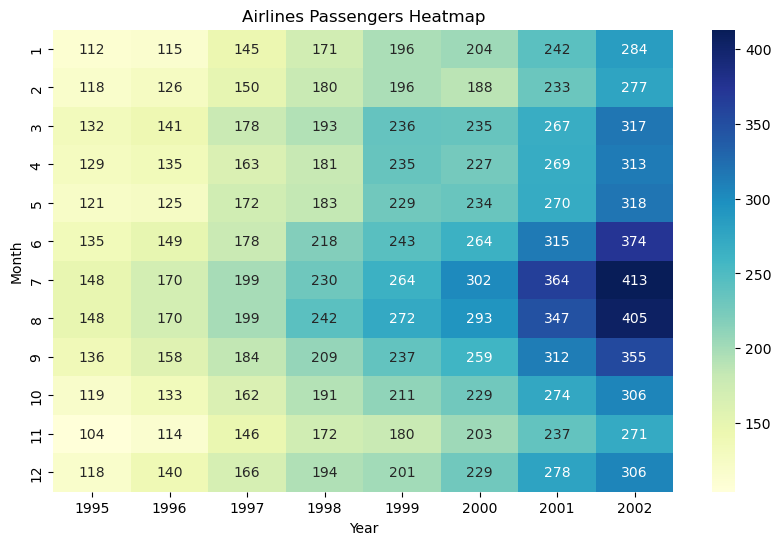

In [17]:
# Pivot the data to create a matrix suitable for heatmap
pivot_data=Airline_data.pivot('Month','Year','Passengers')

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_data,annot=True,fmt="d",cmap="YlGnBu")
plt.title('Airlines Passengers Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

The number of passengers are high in the year 2002 and specially in the month of July.

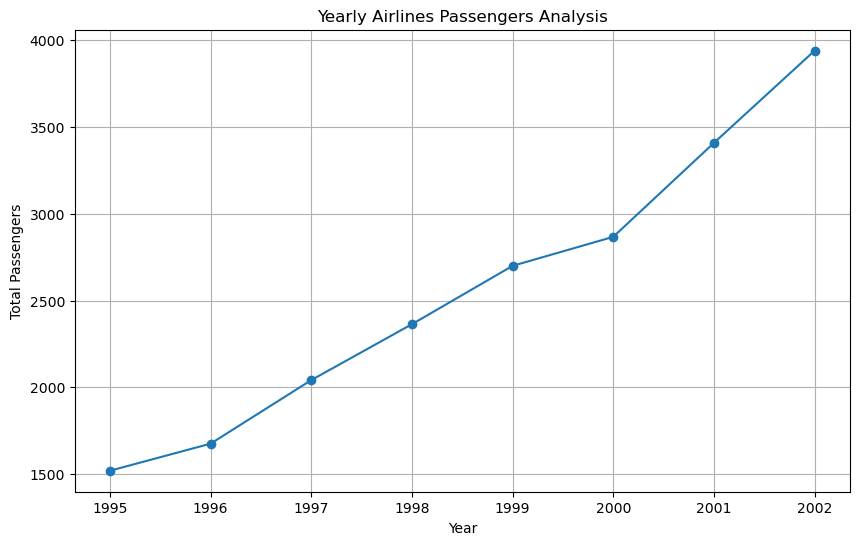

In [18]:
# Aggregate passenger data by year
yearly_passengers=Airline_data.groupby('Year')['Passengers'].sum()

# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(yearly_passengers.index, yearly_passengers.values, marker='o', linestyle='-')
plt.title('Yearly Airlines Passengers Analysis')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.xticks(yearly_passengers.index)
plt.show()

Here we can see that there is an increase in the number of passengers over time.

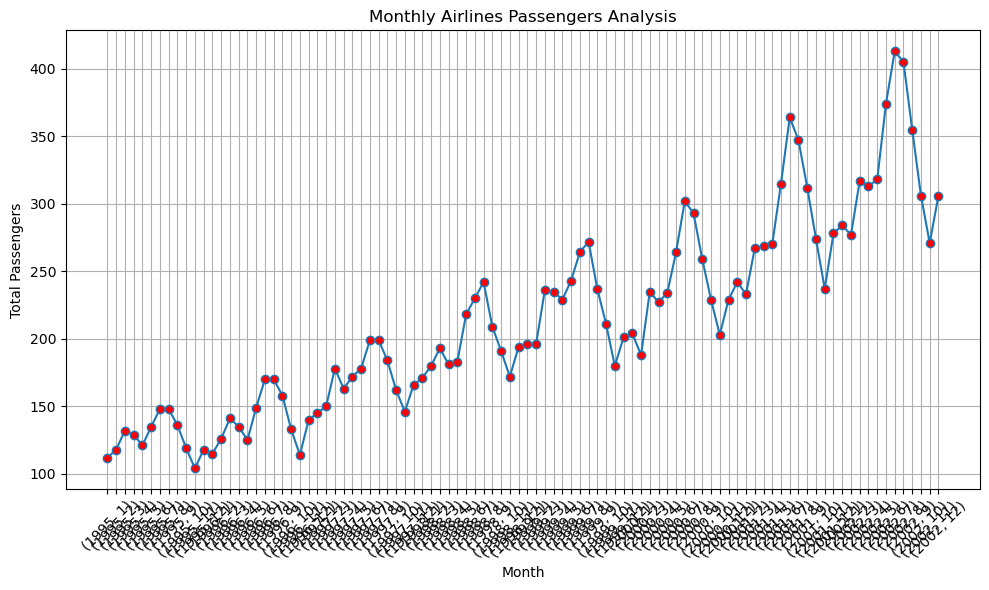

In [19]:
# Aggregate passenger data by month
monthly_passengers=Airline_data.groupby(['Year','Month'])['Passengers'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
monthly_passengers.plot(marker='o', linestyle='-', markerfacecolor='red')
plt.title('Monthly Airlines Passengers Analysis')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.xticks(range(len(monthly_passengers)), monthly_passengers.index, rotation=45)
plt.tight_layout()
plt.show()

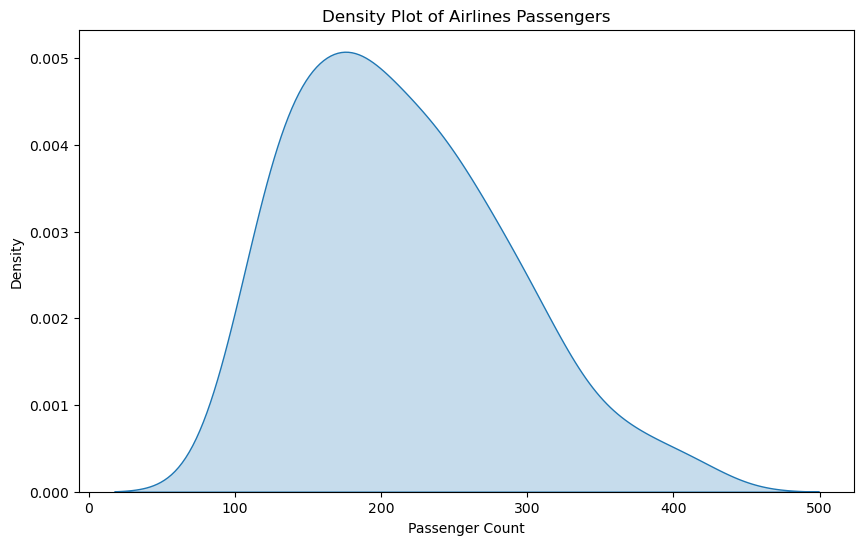

In [20]:
# Plot the density plot
plt.figure(figsize=(10,6))
sns.kdeplot(data=Airline_data['Passengers'],shade=True)
plt.title('Density Plot of Airlines Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Density')
plt.show()

The data is normally distributed.

#### Moving Average Methodology

The commonly used time series method is the Moving Average. This method is slick with random short-term variations. Relatively associated with the components of time series.

The Moving Average (MA) (or) Rolling Mean: The value of MA is calculated by taking average data of the time-series within k periods.

Let’s see the types of moving averages:

+ Simple Moving Average (SMA),
+ Cumulative Moving Average (CMA)
+ Exponential Moving Average (EMA)

**1.Simple Moving Average (SMA)**

The Simple Moving Average (SMA) calculates the unweighted mean of the previous M or N points. We prefer selecting sliding window data points based on the amount of smoothing, as increasing the value of M or N improves smoothing but reduces accuracy.

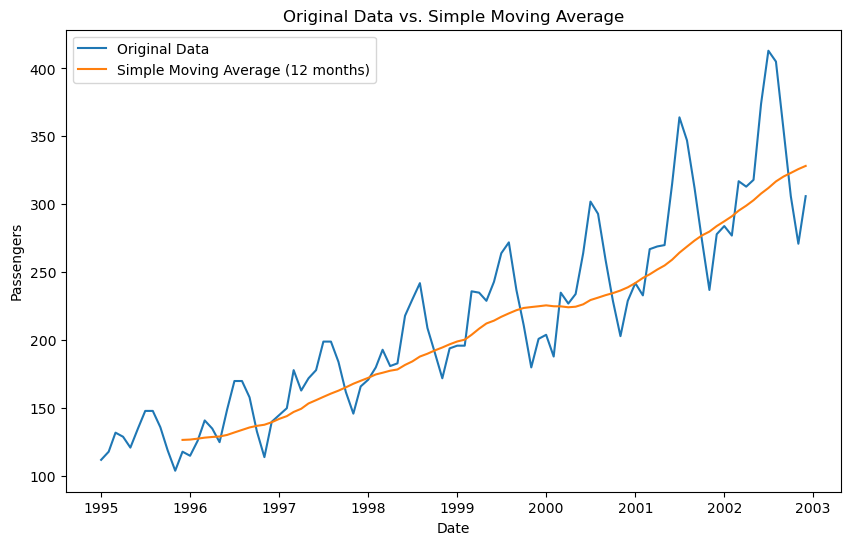

In [21]:
# Calculate simple moving average with window size 12 (for yearly data)
Airline_data['SMA_12']=Airline_data['Passengers'].rolling(window=12).mean()

# Plot the original data and simple moving average
plt.figure(figsize=(10,6))
plt.plot(Airline_data['Date'],Airline_data['Passengers'],label='Original Data')
plt.plot(Airline_data['Date'],Airline_data['SMA_12'],label='Simple Moving Average (12 months)')
plt.title('Original Data vs. Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**2.Cumulative Moving Average (CMA)**

The CMA is the unweighted mean of past values till the current time.

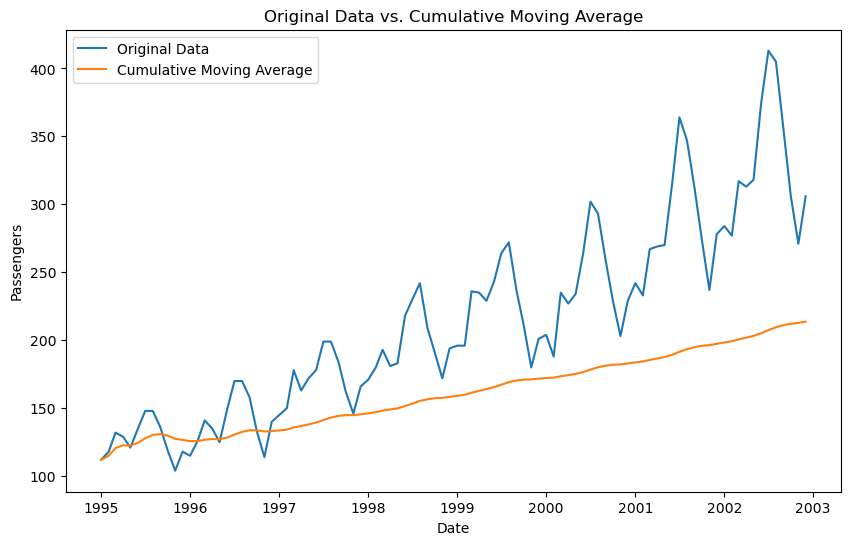

In [22]:
# Calculate cumulative moving average
Airline_data['CMA']=Airline_data['Passengers'].expanding().mean()

# Plot the original data and cumulative moving average
plt.figure(figsize=(10,6))
plt.plot(Airline_data['Date'],Airline_data['Passengers'],label='Original Data')
plt.plot(Airline_data['Date'],Airline_data['CMA'],label='Cumulative Moving Average')
plt.title('Original Data vs. Cumulative Moving Average')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**3.Exponential Moving Average (EMA)**

EMA is mainly used to identify trends and filter out noise. The weight of elements is decreased gradually over time. This means It gives weight to recent data points, not historical ones. Compared with SMA, the EMA is faster to change and more sensitive.
+ α –>Smoothing Factor.
  + It has a value between 0,1.
  + Represents the weighting applied to the very recent period.

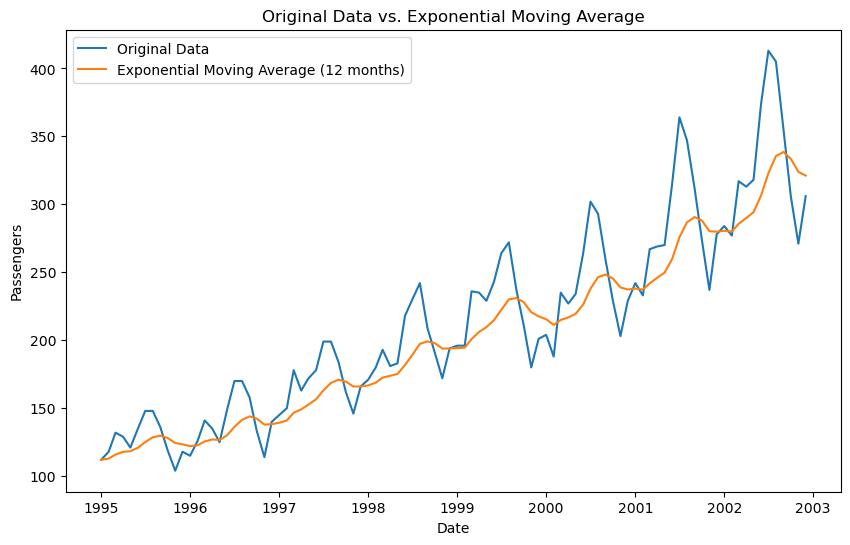

In [23]:
# Calculate exponential moving average with span=12 (for yearly data)
Airline_data['EMA_12']=Airline_data['Passengers'].ewm(span=12, adjust=False).mean()

# Plot the original data and exponential moving average
plt.figure(figsize=(10, 6))
plt.plot(Airline_data['Date'],Airline_data['Passengers'], label='Original Data')
plt.plot(Airline_data['Date'],Airline_data['EMA_12'], label='Exponential Moving Average (12 months)')
plt.title('Original Data vs. Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

#### Converting Non-Stationary Into Stationary

There are three methods available for this conversion – detrending, differencing, and transformation.

**1.Detrending**

It involves removing the trend effects from the given dataset and showing only the differences in values from the trend. It always allows cyclical patterns to be identified.
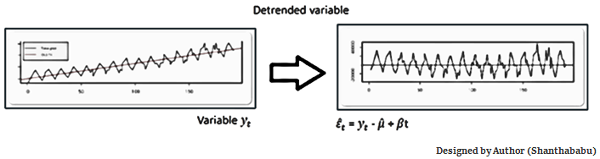

**2.Differencing**

This is a simple transformation of the series into a new time series, which we use to remove the series dependence on time and stabilize the mean of the time series, so trend and seasonality are reduced during this transformation.

+ Yt= Yt – Yt-1
+ Yt=Value with time
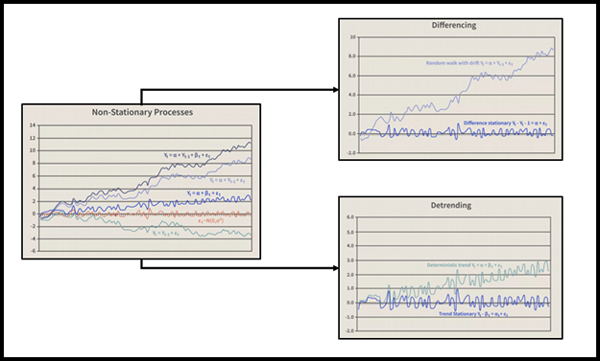

**3.Transformation**

This includes three different methods they are Power Transform, Square Root, and Log Transfer. The most commonly used one is Log Transfer.

In [24]:
# Seasonal differencing
data1['Seasonal_Difference']=data1['Passengers']-data1['Passengers'].shift(12)

# Drop NaN values resulting from differencing
data1.dropna(inplace=True)

# Save the stationary dataset
data1.to_csv("stationary_airline_data.csv", index=False)

In [25]:
# Load stationary Airlines Passengers dataset
stationary_data=pd.read_csv("stationary_airline_data.csv")
stationary_data.head()

,Date,Passengers,Day,Month,Year,Seasonal_Difference
0,1996-01-01,115,1,1,1996,3.0
1,1996-02-01,126,1,2,1996,8.0
2,1996-03-01,141,1,3,1996,9.0
3,1996-04-01,135,1,4,1996,6.0
4,1996-05-01,125,1,5,1996,4.0


In [35]:
stationary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 84 non-null     object 
 1   Passengers           84 non-null     int64  
 2   Day                  84 non-null     int64  
 3   Month                84 non-null     int64  
 4   Year                 84 non-null     int64  
 5   Seasonal_Difference  84 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.1+ KB


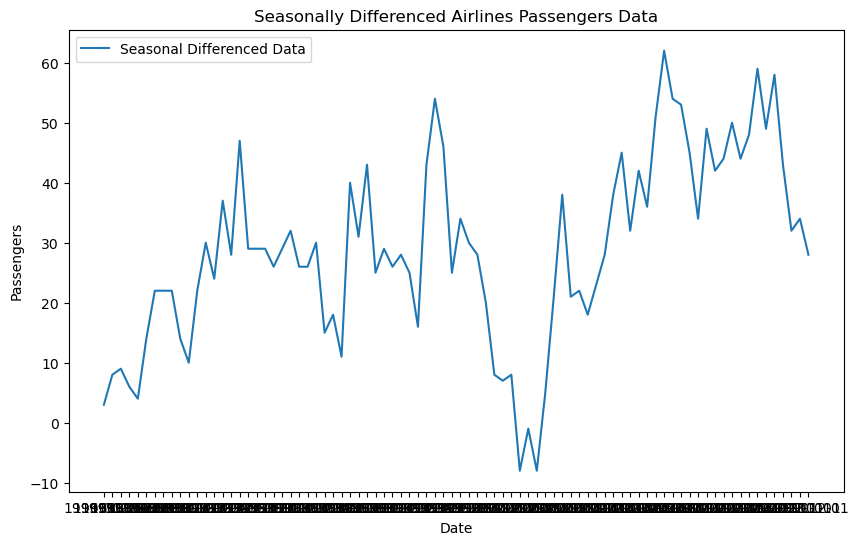

In [29]:
# Plot the stationary data
plt.figure(figsize=(10, 6))
plt.plot(stationary_data['Date'], stationary_data['Seasonal_Difference'], label='Seasonal Differenced Data')
plt.title('Seasonally Differenced Airlines Passengers Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**Time series decomposition**

Time series decomposition is a technique used to break down a time series into several components, typically trend, seasonal, and residual (or error) components. The decomposition plot visualizes these components separately, which can provide valuable insights into the underlying patterns and behavior of the time series data. 

1. **Trend Component**: This component represents the underlying long-term trend or pattern in the data, ignoring any seasonal or irregular fluctuations. Understanding the trend component helps in identifying overall patterns, such as increasing, decreasing, or stable behavior over time.

2. **Seasonal Component**: Seasonality refers to repetitive and predictable patterns that occur at fixed intervals within the time series data. This component captures these seasonal variations, such as daily, weekly, monthly, or yearly patterns. Analyzing the seasonal component is crucial for identifying recurring patterns and understanding the seasonal effects on the data.

3. **Residual Component**: Also known as the irregular or error component, this captures the random fluctuations or noise in the data that cannot be explained by the trend or seasonal components. Analyzing the residual component helps in assessing the goodness of fit of the decomposition model and identifying any remaining patterns or anomalies.

The decomposition plot typically consists of separate subplots for each component, allowing you to visualize them individually and compare their magnitudes and patterns. This visualization aids in:

- Identifying trends: Is the trend increasing, decreasing, or stationary over time?
- Detecting seasonality: Are there recurring patterns or cycles at specific intervals?
- Assessing model adequacy: Does the decomposition adequately capture the underlying patterns, or are there significant residuals remaining?
- Forecasting: Understanding the trend and seasonal components can help in making forecasts and predictions about future values of the time series.

In [27]:
import statsmodels.api as sm

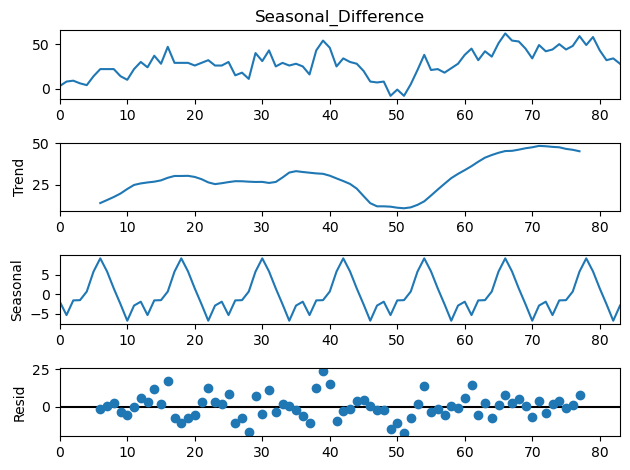

In [30]:
# Time Series Decomposition
decomposition = sm.tsa.seasonal_decompose(stationary_data['Seasonal_Difference'], model='additive',period=12)
decomposition.plot()
plt.show()

**Auto-Correlation Function (ACF)**

ACF indicates how similar a value is within a given time series and the previous value. (OR) It measures the degree of the similarity between a given time series and the lagged version of that time series at the various intervals we observed.

Python Statsmodels library calculates autocorrelation. It identifies a set of trends in the given dataset and the influence of former observed values on the currently observed values.

**Partial Auto-Correlation (PACF)**

PACF is similar to Auto-Correlation Function and is a little challenging to understand. It always shows the correlation of the sequence with itself with some number of time units per sequence order in which only the direct effect has been shown, and all other intermediary effects are removed from the given time series.

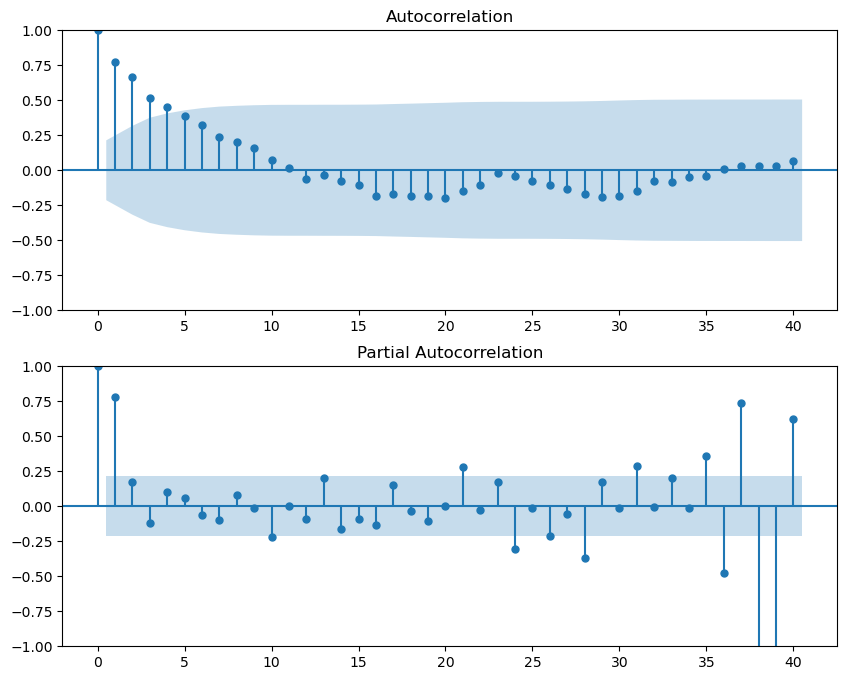

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation Analysis
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(stationary_data['Seasonal_Difference'], lags=40, ax=ax[0])
plot_pacf(stationary_data['Seasonal_Difference'], lags=40, ax=ax[1])
plt.show()

A time series forecast is predicting the future value of a variable by looking into the past history with the help of some additional features which are likely to affect those variables. The algorithms are designed in such a way that it looks at the trends of the past and forecasts the future values.
There are dozens of algorithms which can do time series forecast. There are the basic ones like Auto Regression, Moving average, ARMA, ARIMA, simple exponential smoothing, Holt Winter’s method, linear regression to advanced ones like the multiple linear regression, LSTM (Long Short Term Memory), Artificial neural networks and many more. Based on the data set and the supporting features we can make an informed decision and finalise the model.

**Auto-Regressive Model**

An auto-regressive model is a simple model that predicts future performance based on past performance. It is mainly used for forecasting when there is some correlation between values in a given time series and those that precede and succeed (back and forth).

An AR is a Linear Regression model that uses lagged variables as input. By indicating the input, the Linear Regression model can be easily built using the scikit-learn library. Statsmodels library provides autoregression model-specific functions where you must specify an appropriate lag value and train the model. It is provided in the AutoTeg class to get the results using simple steps.
+ Creating the model AutoReg()
+ Call fit() to train it on our dataset.
+ Returns an AutoRegResults object.
+ Once fit, make a prediction by calling the predict () function

The equation for the AR model (Let’s compare Y=mX+c)
+ Yt =C+b1 Yt-1+ b2 Yt-2+……+ bp Yt-p+ Ert

Key Parameters

+ p=past values
+ Yt=Function of different past values
+ Ert=errors in time
+ C=intercept

In [34]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [36]:
# Convert the date column to datetime type
stationary_data['Date']=pd.to_datetime(stationary_data[['Year', 'Month', 'Day']])

In [37]:
# Set the date column as the index
stationary_data.set_index('Date', inplace=True)

In [38]:
# Split data into train and test sets
train_size=int(0.8 * len(stationary_data))
train_data,test_data=stationary_data[:train_size],stationary_data[train_size:]

In [39]:
# Fit AR model
lag = 10  # lag order of the autoregressive model
model = AutoReg(train_data['Passengers'], lags=lag)
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

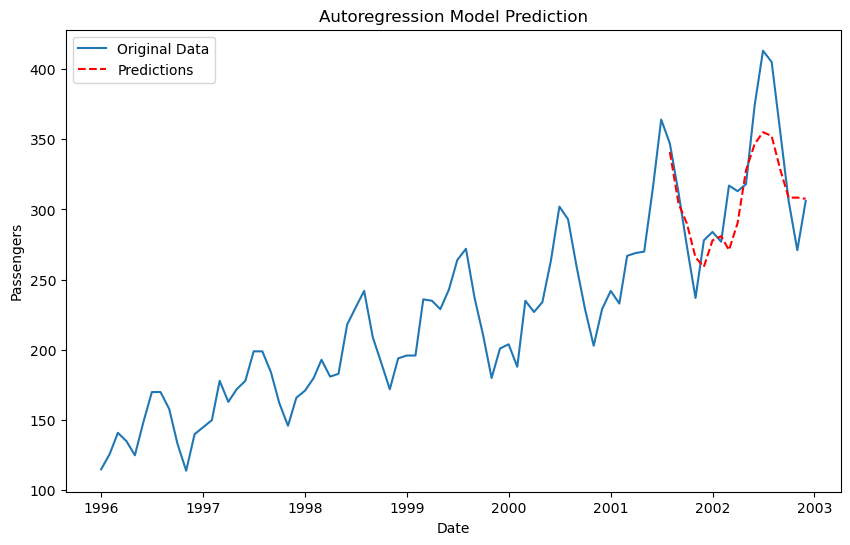

In [41]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(stationary_data.index, stationary_data['Passengers'], label='Original Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Autoregression Model Prediction')
plt.legend()
plt.show()

In [42]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Passengers'], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 783.8561768468235


**Moving Average (Weights – Simple Moving Average)**

It creates a plot to visualize the original passenger counts along with the computed moving averages.

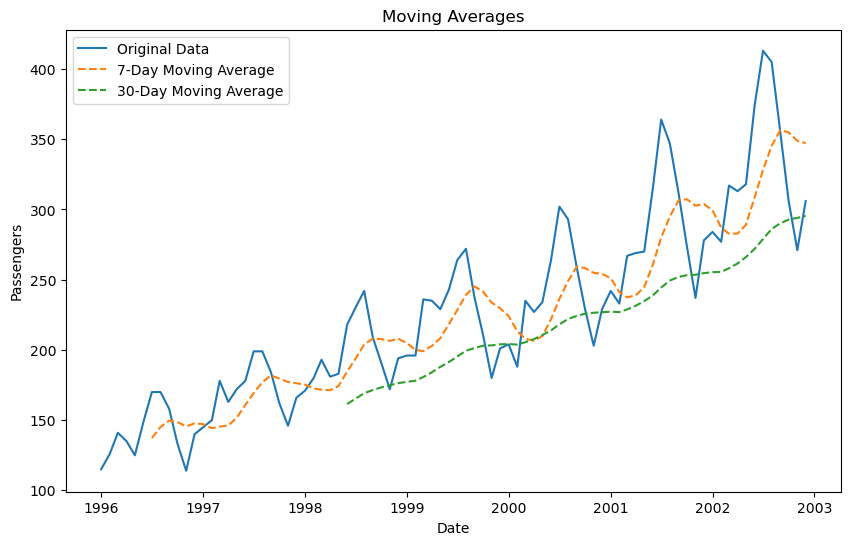

In [43]:
# Compute 7-day and 30-day moving averages
moving_avg_7d = stationary_data['Passengers'].rolling(window=7).mean()
moving_avg_30d = stationary_data['Passengers'].rolling(window=30).mean()

# Plot original data and moving averages
plt.figure(figsize=(10, 6))
plt.plot(stationary_data.index, stationary_data['Passengers'], label='Original Data')
plt.plot(stationary_data.index, moving_avg_7d, label='7-Day Moving Average', linestyle='--')
plt.plot(stationary_data.index, moving_avg_30d, label='30-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Moving Averages')
plt.legend()
plt.show()

+ The x-axis represents dates, and the y-axis represents passenger counts.
+ The original passenger counts are plotted as a solid line.
+ The 7-day moving average is plotted as a dashed line.
+ The 30-day moving average is also plotted as a dashed line.

**ARMA and ARIMA**

ARMA is a combination of the Auto-Regressive and Moving Average models for forecasting. This model provides a weakly stationary stochastic process in terms of two polynomials, one for the Auto-Regressive and the second for the Moving Average.
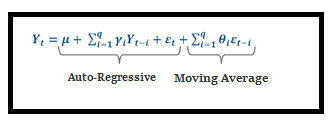

ARMA is best for predicting stationary series. ARIMA was thus developed to support both stationary as well as non-stationary series.
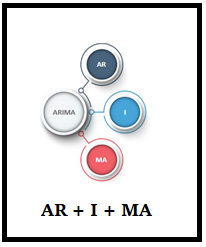
+ AR ==> Uses past values to predict the future.
+ MA ==> Uses past error terms in the given series to predict the future.
+ I==> Uses the differencing of observation and makes the stationary data.

AR+I+MA= ARIMA

Understand the signature of ARIMA
+ p==> log order => No of lag observations.
+ d==> degree of differencing => No of times that the raw observations are differenced.
+ q==>order of moving average => the size of the moving average window

Implementation Steps for ARIMA
+ Plot a time series format
+ Difference to make stationary on mean by removing the trend
+ Make stationary by applying log transform.
+ Difference log transform to make as stationary on both statistic mean and variance
+ Plot ACF & PACF, and identify the potential AR and MA model
+ Discovery of best fit ARIMA model
+ Forecast/Predict the value using the best fit ARIMA model
+ Plot ACF & PACF for residuals of the ARIMA model, and ensure no more information is left.

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
# Fit ARMA model
p = 3  # Autoregressive (AR) order
q = 2  # Moving Average (MA) order
model = ARIMA(train_data['Passengers'], order=(p, 0, q))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

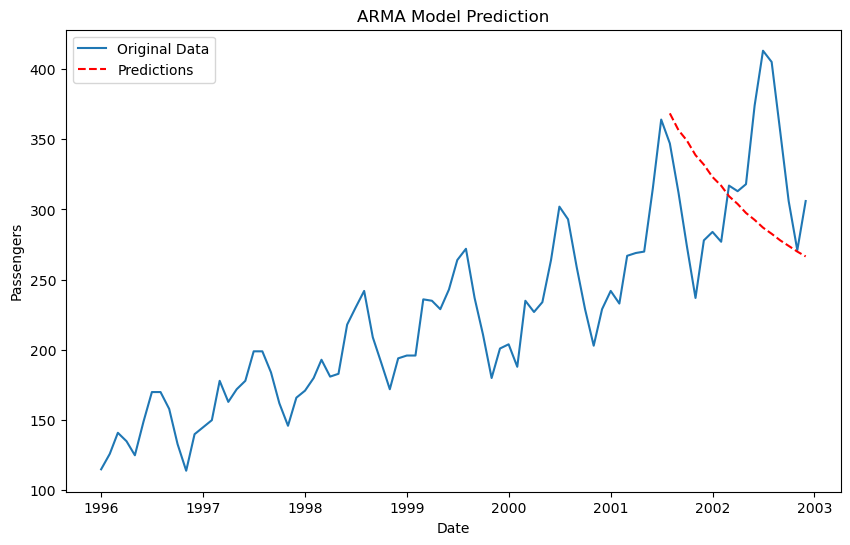

In [49]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(stationary_data.index, stationary_data['Passengers'], label='Original Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('ARMA Model Prediction')
plt.legend()
plt.show()

In [50]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Passengers'], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 4174.175948279361


In [51]:
# Fit ARIMA model
p = 3  # Autoregressive (AR) order
d = 1  # Differencing order (usually set to 1 for making the series stationary)
q = 2  # Moving Average (MA) order
model = ARIMA(train_data['Passengers'], order=(p, d, q))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

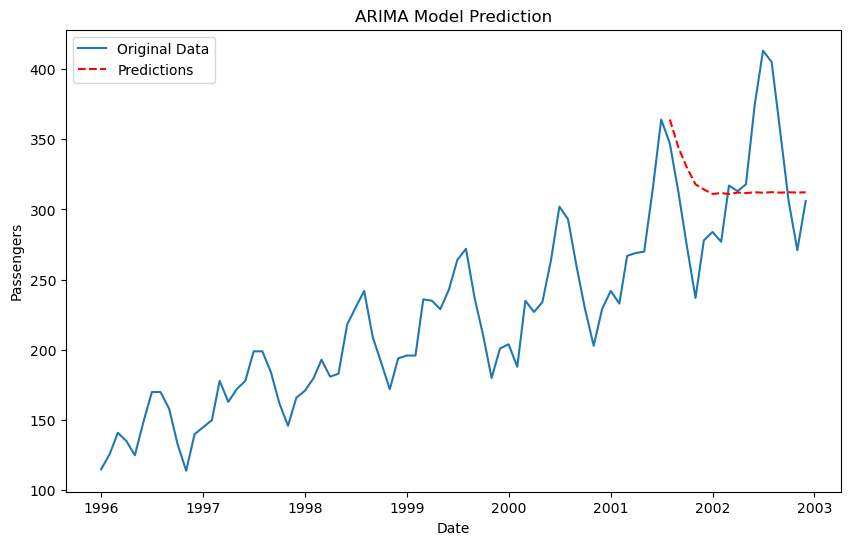

In [53]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(stationary_data.index, stationary_data['Passengers'], label='Original Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('ARIMA Model Prediction')
plt.legend()
plt.show()

In [54]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Passengers'], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 2383.97588158042


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   67
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -290.746
Date:                Fri, 15 Mar 2024   AIC                            593.492
Time:                        20:07:06   BIC                            606.630
Sample:                    01-01-1996   HQIC                           598.683
                         - 07-01-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1067      0.255      0.419      0.675      -0.393       0.606
ar.L2          0.5198      0.240      2.165      0.030       0.049       0.990
ar.L3         -0.2435      0.165     -1.473      0.141      -0.568       0.081
ma.L1          0.1908     11.107      0.017      0.986     -21.579      21.961
ma.L2         -0.8090      9.012     -0.090      0.928     -18.472      16.854
sigma2       379.6365   4197.607      0.090      0.928   -7847.522    8606.795
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 2.11
Prob(Q):                              0.58   Prob(JB):                         0.35
Heteroskedasticity (H):               2.80   Skew:                             0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model_fit.forecast(3)[0]

364.02986056160626